In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


RANDOM_STATE = 42
 



# Step 1: Exploratory Data Analysis (EDA)

- 1-Load the Kaggle dataset and show first rows

In [47]:
data_path = "Data/creditcard.csv"
df = pd.read_csv(data_path)

In [48]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- 2- Check dataset shape and column information.

In [49]:
df.shape
 

(284807, 31)

In [50]:
display(df.head(10)) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [51]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [54]:
df.duplicated().sum()           

np.int64(1081)

In [56]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [57]:
df.duplicated().sum()  

np.int64(0)

- 3- Statistical summary


In [58]:
num_cols = df.select_dtypes(include=np.number).columns
summary = df[num_cols].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).T
display(summary)

,count,mean,std,min,1%,5%,50%,95%,99%,max
Time,283726.0,94811.077600,47481.047891,0.000000,2426.250000,25297.000000,84692.500000,164138.750000,170557.750000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-6.498966,-2.881365,0.020384,2.081438,2.237325,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-4.960666,-1.973354,0.063949,1.796086,3.766340,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-3.950781,-2.386035,0.179963,2.062083,2.725875,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-3.124264,-2.198094,-0.022248,2.556595,4.244400,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-3.036290,-1.698583,-0.053468,2.099693,3.426968,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-2.123921,-1.407245,-0.275168,3.159414,4.199590,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-2.983436,-1.431636,0.040859,1.407143,2.680019,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-4.013525,-0.839709,0.021898,1.042342,2.044163,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-2.454438,-1.759186,-0.052596,1.778622,2.976341,15.594995


- 4- Check for outliers

In [59]:

q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

out_total = ((df[num_cols] < lower) | (df[num_cols] > upper)).sum()
out_pct = (out_total / len(df) * 100).round(3)

outliers_table = (
    out_total.to_frame("outliers_total")
    .assign(outliers_pct=out_pct)
    .sort_values("outliers_total", ascending=False)
)
display(outliers_table.head(10))

,outliers_total,outliers_pct
V27,38799,13.675
Amount,31685,11.167
V28,30094,10.607
V20,27553,9.711
V8,23904,8.425
V6,22886,8.066
V23,18467,6.509
V12,15282,5.386
V21,14401,5.076
V14,14060,4.955


- Boxplots for the columns

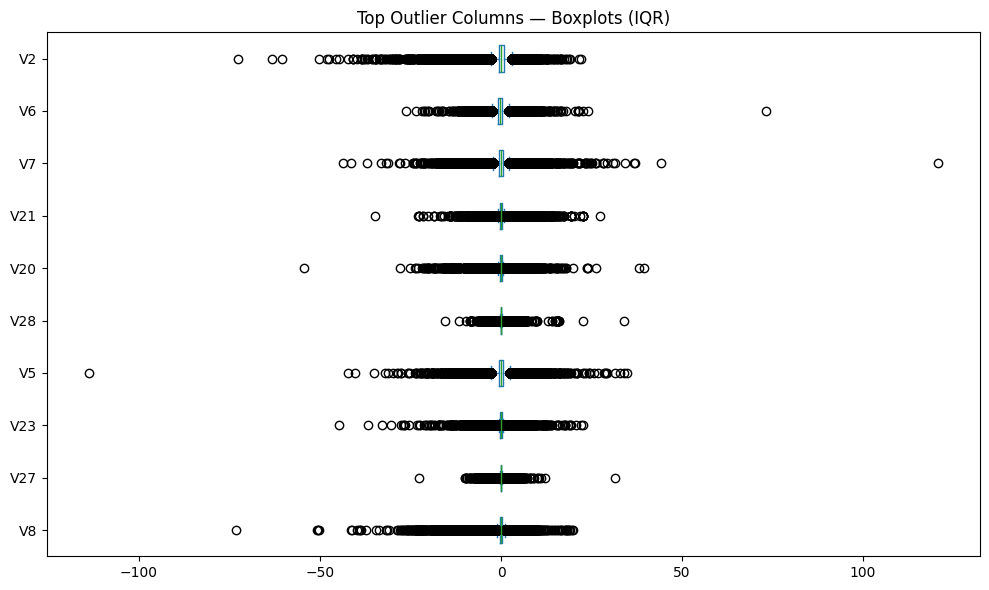

In [60]:
top_cols = ["V8","V27","V23","V5","V28","V20","V21","V7","V6","V2"]
ax = df[top_cols].plot(kind="box", vert=False, figsize=(10, 6))
ax.set_title("Top Outlier Columns — Boxplots (IQR)")
plt.tight_layout(); plt.show()

- distributions.

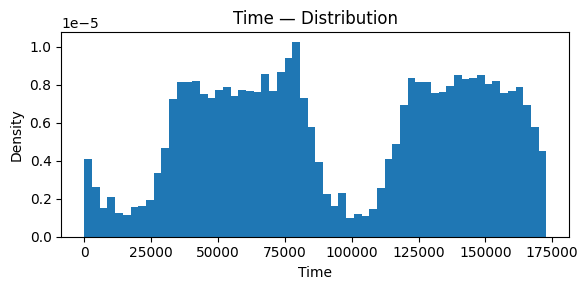

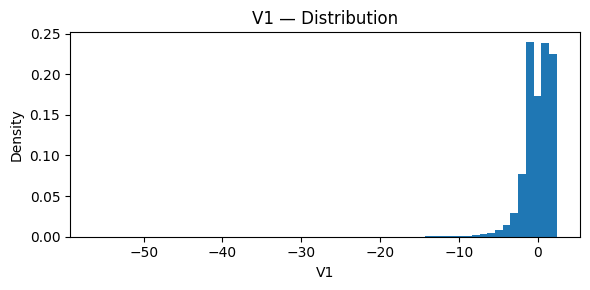

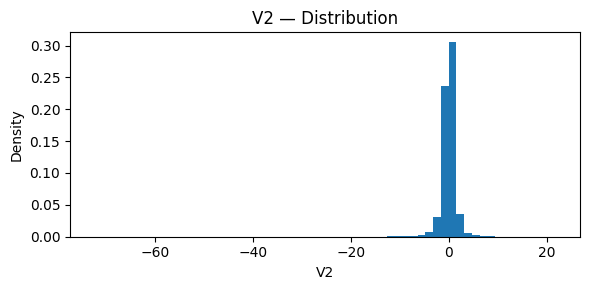

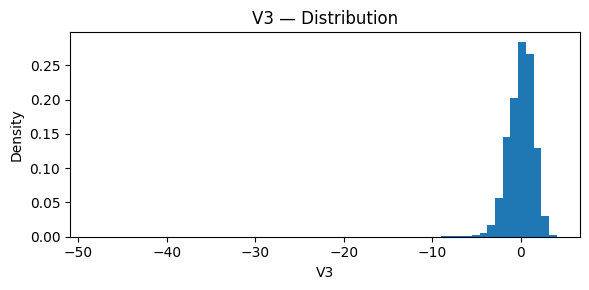

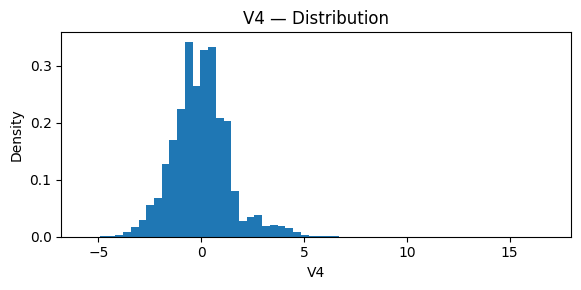

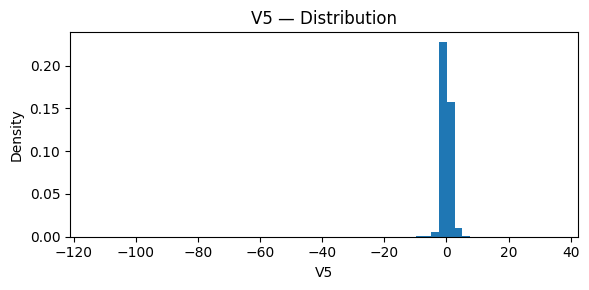

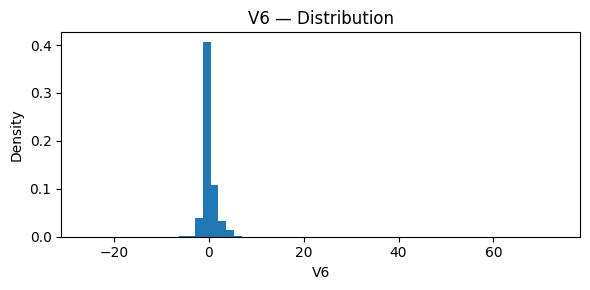

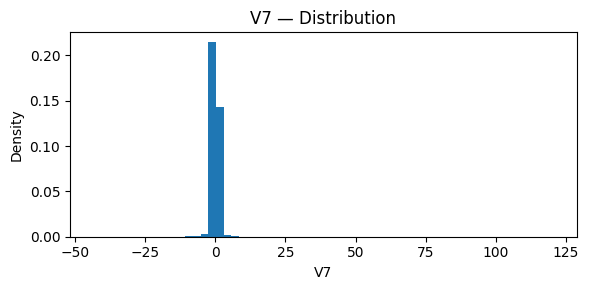

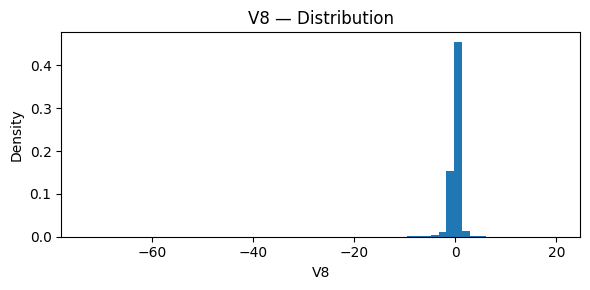

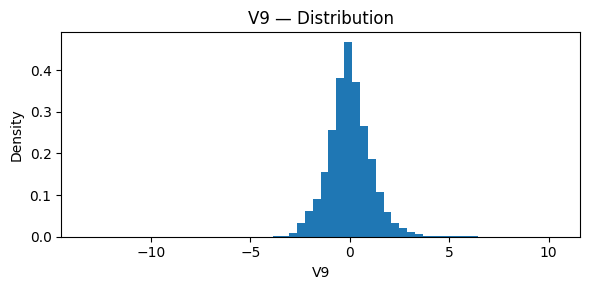

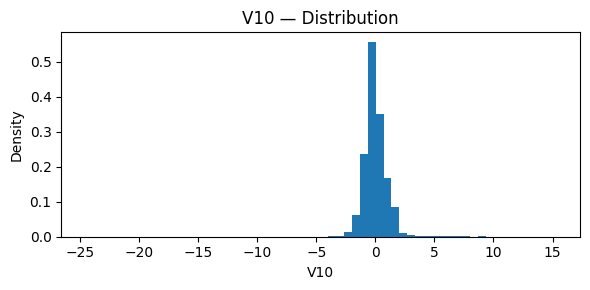

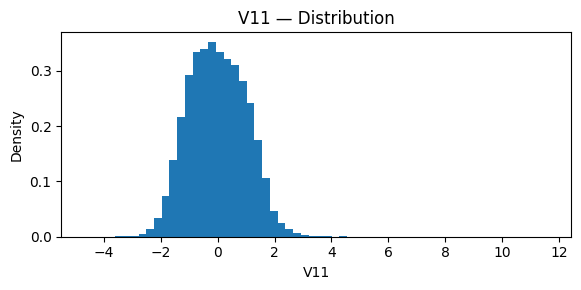

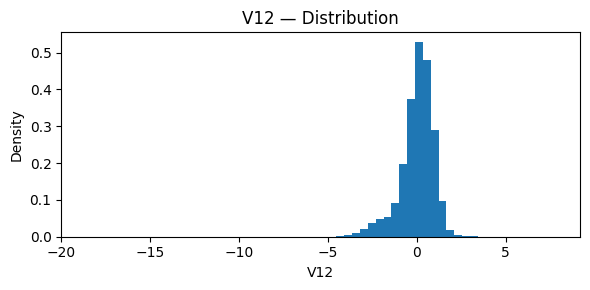

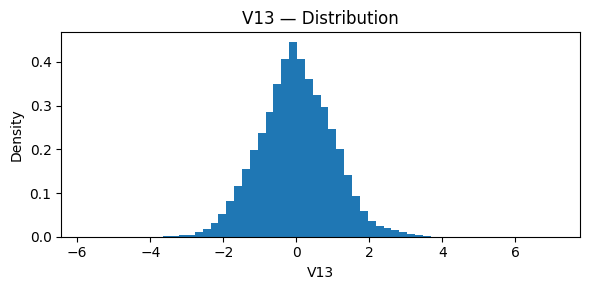

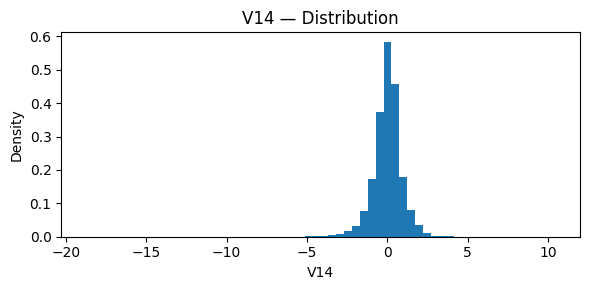

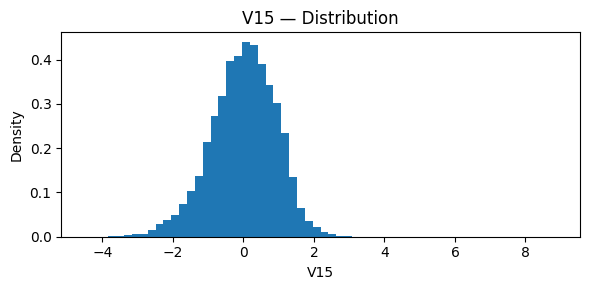

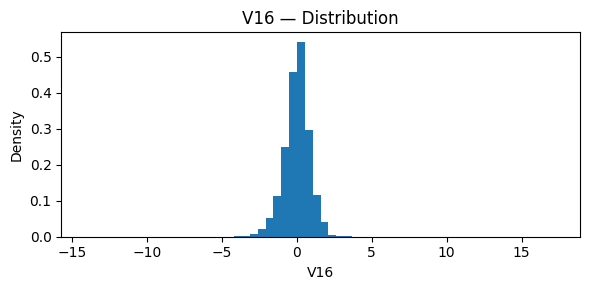

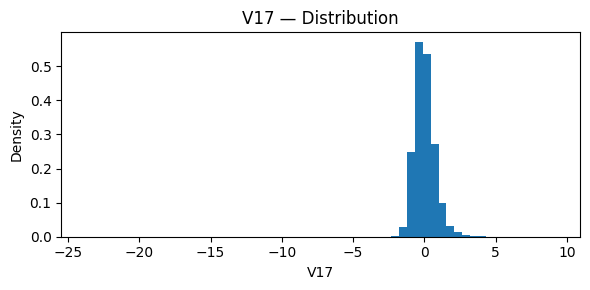

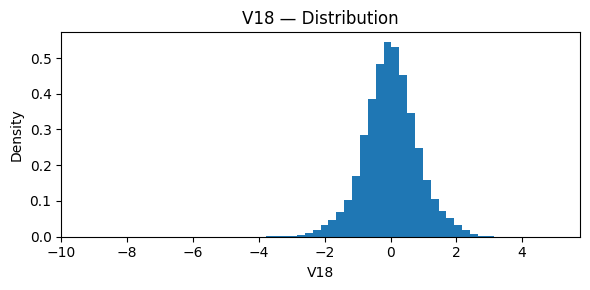

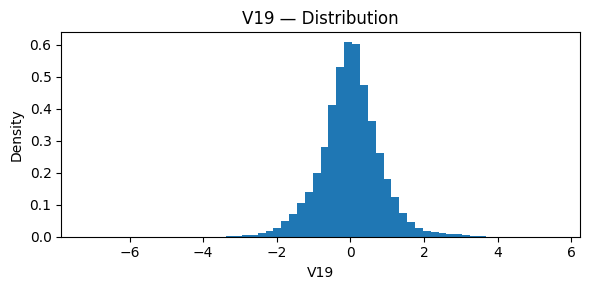

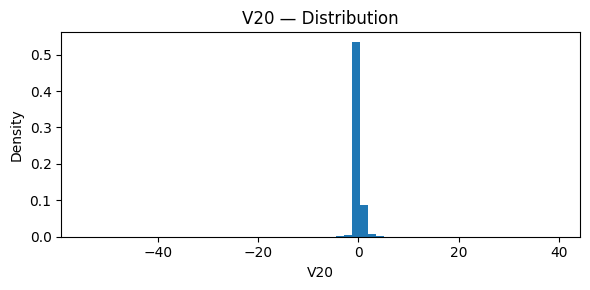

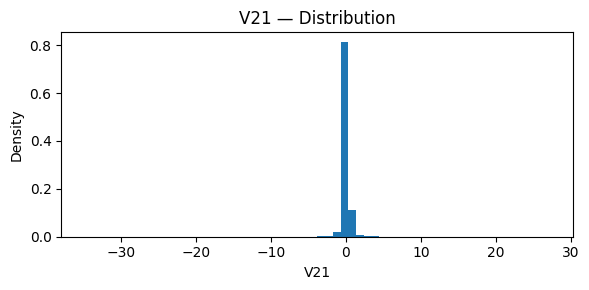

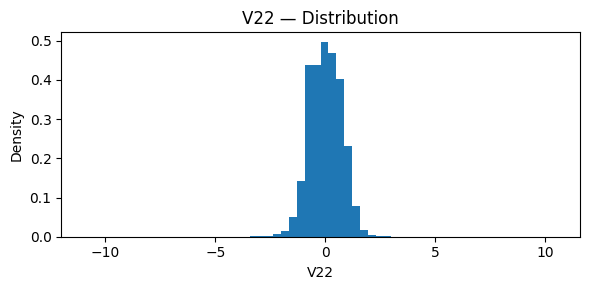

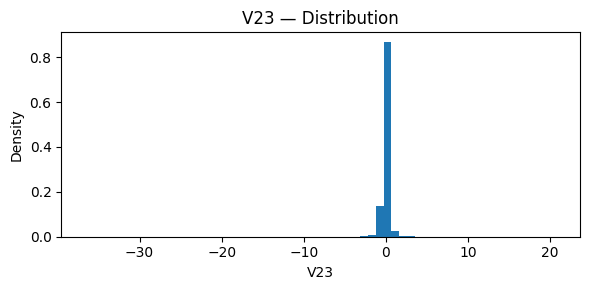

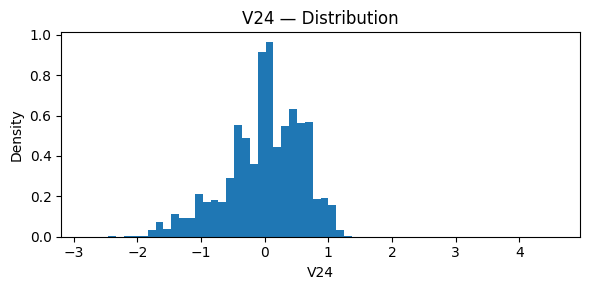

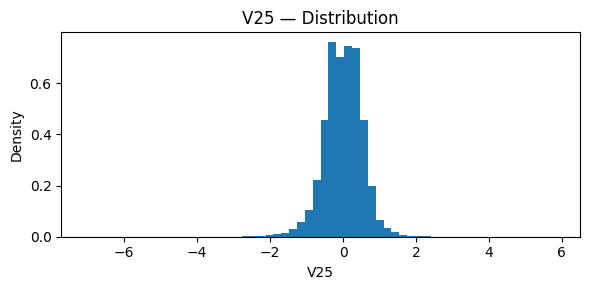

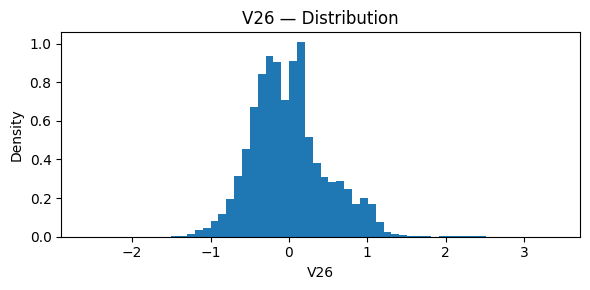

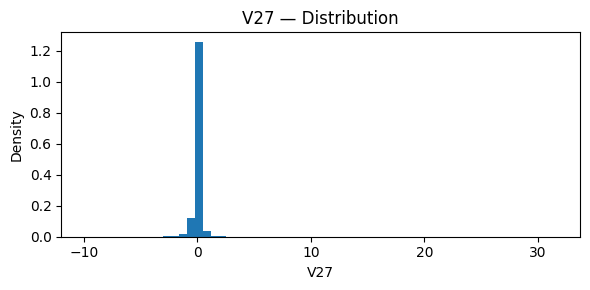

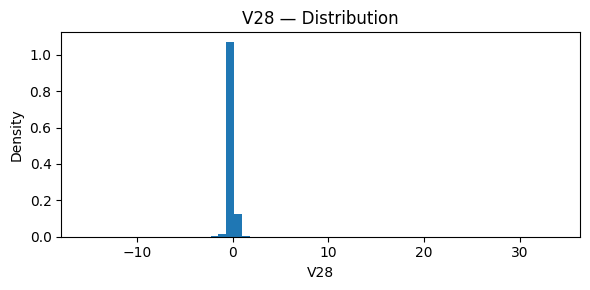

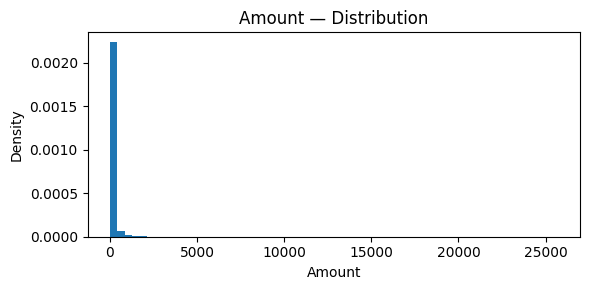

In [61]:
# Overall distributions for all numeric columns (one by one)
import matplotlib.pyplot as plt
import numpy as np

# choose numeric columns (skip id/target if present)
exclude = {"id", "Class"}
num_cols = [c for c in df.select_dtypes(include=np.number).columns if c not in exclude]

# sample for speed if the dataset is huge
view = df if len(df) <= 150_000 else df.sample(150_000, random_state=42)

for col in num_cols:
    plt.figure(figsize=(6,3))
    view[col].plot(kind="hist", bins=60, density=True)
    plt.title(f"{col} — Distribution")
    plt.xlabel(col); plt.ylabel("Density")
    plt.tight_layout(); plt.show()


- 5- Class imbalance check.

- Count fraudulent vs. non-fraudulent transactions

In [62]:
non_fraud = (df["Class"] == 0).sum()
fraud = (df["Class"] == 1).sum()
print(f"Non-Fraud: {non_fraud}")
print(f"Fraud: {fraud}")


Non-Fraud: 283253
Fraud: 473


- Bar plot

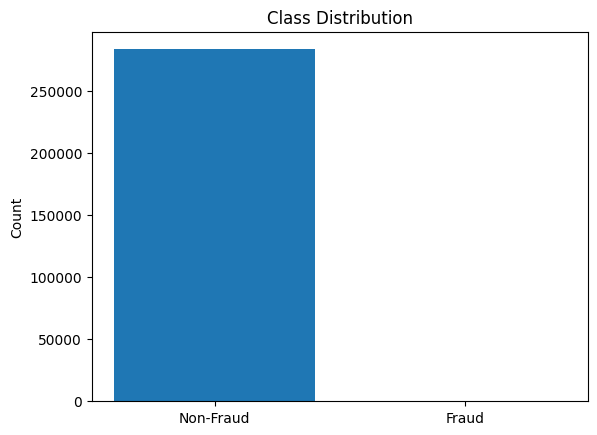

In [63]:
counts = df["Class"].value_counts().sort_index() 
labels = ["Non-Fraud", "Fraud"]
values = [counts.get(0, 0), counts.get(1, 0)]
plt.figure()
plt.bar(labels, values)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()

- Pie chart

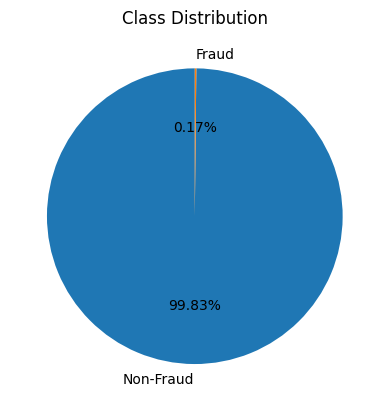

In [64]:
plt.figure()
plt.pie(values, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Class Distribution")
plt.show()

- Correlation and feature analysis.

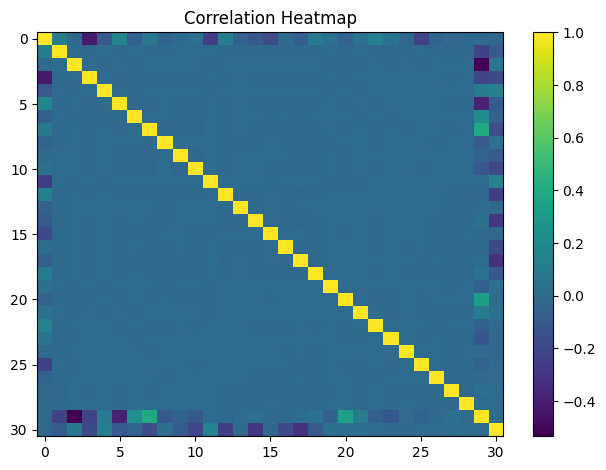

Top features correlated with Class:


V17    0.313498
V14    0.293375
V12    0.250711
V10    0.206971
V16    0.187186
V3     0.182322
V7     0.172347
V11    0.149067
V4     0.129326
V18    0.105340
Name: Class, dtype: float64

In [66]:
corr = df.select_dtypes(include=np.number).corr(numeric_only=True)


plt.imshow(corr, aspect="auto")
plt.colorbar(); plt.title("Correlation Heatmap")
plt.tight_layout(); plt.show()


target_corr = corr["Class"].drop(labels=["Class"])
top_corr = target_corr.abs().sort_values(ascending=False)
print("Top features correlated with Class:")
display(top_corr.head(10))


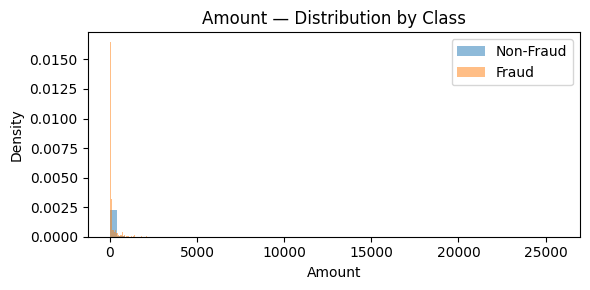

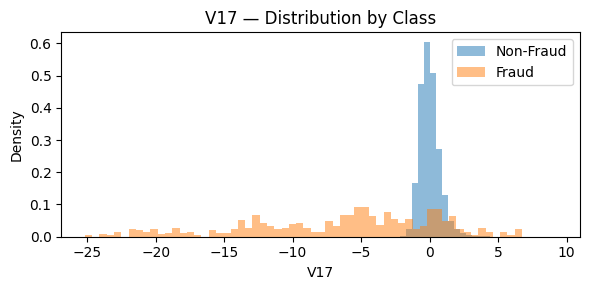

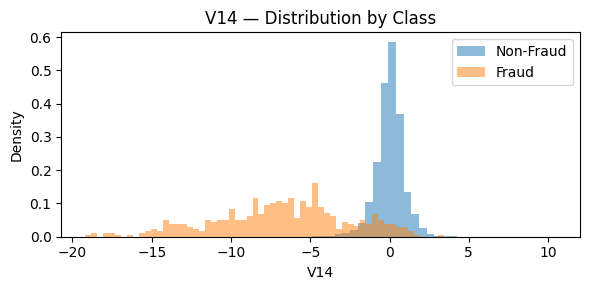

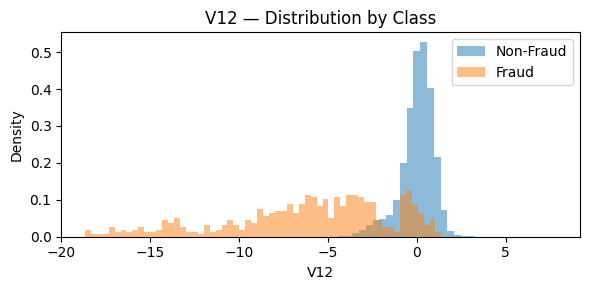

In [67]:
feat_list = []
if "Amount" in df.columns:
    feat_list.append("Amount")

feat_list += [c for c in top_corr.index if c != "Amount"][:3]  # add 3 more

for col in feat_list:
    plt.figure(figsize=(6,3))
    df.loc[df["Class"]==0, col].plot(kind="hist", bins=60, alpha=0.5, density=True, label="Non-Fraud")
    df.loc[df["Class"]==1, col].plot(kind="hist", bins=60, alpha=0.5, density=True, label="Fraud")
    plt.title(f"{col} — Distribution by Class")
    plt.xlabel(col); plt.ylabel("Density"); plt.legend()
    plt.tight_layout(); plt.show()


# Step 2: Data Preprocessing

- 1- Handle missing values (numeric → median)

In [70]:
# 1) Fill NaNs (numeric median)
df = df.fillna(df.median(numeric_only=True))

# 2) Features/target (drop id if present)
feat_cols = [c for c in df.columns if c not in ["Class", "id"]]
X = df[feat_cols]
y = df["Class"].astype(int)

# 3) Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4) Scale (for SVM/KNN; trees can use X_train/X_test directly)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [71]:
print("Train:", X_train.shape, " Test:", X_test.shape)
print("Class ratio train:", y_train.value_counts(normalize=True).round(4).to_dict())
print("Class ratio test :", y_test.value_counts(normalize=True).round(4).to_dict())

Train: (226980, 30)  Test: (56746, 30)
Class ratio train: {0: 0.9983, 1: 0.0017}
Class ratio test : {0: 0.9983, 1: 0.0017}


In [72]:
# === Step 3: Baseline models (simple) ===
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Optional XGBoost
try:
    from xgboost import XGBClassifier
    use_xgb = True
except Exception:
    use_xgb = False

models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, class_weight="balanced", n_jobs=-1, random_state=42),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
}

if use_xgb:
    neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
    spw = neg / max(pos, 1)
    models["XGBoost"] = XGBClassifier(
        n_estimators=400, max_depth=4, learning_rate=0.08,
        subsample=0.9, colsample_bytree=0.9,
        scale_pos_weight=spw, eval_metric="logloss",
        tree_method="hist", n_jobs=-1, random_state=42
    )

rows = []
for name, clf in models.items():
    # scale only for LogReg/SVM
    Xtr, Xte = (X_train_scaled, X_test_scaled) if name in ["LogReg", "SVM"] else (X_train, X_test)

    clf.fit(Xtr, y_train)
    proba = clf.predict_proba(Xte)[:, 1]
    yhat  = (proba >= 0.5).astype(int)

    # metrics
    p, r, f1, _ = precision_recall_fscore_support(y_test, yhat, average="binary", zero_division=0)
    roc  = roc_auc_score(y_test, proba)
    prau = average_precision_score(y_test, proba)

    print(f"\n=== {name} 0.5 ===")
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat, digits=4, zero_division=0))

    rows.append({"model": name, "precision": p, "recall": r, "f1": f1, "roc_auc": roc, "pr_auc": prau})

results = pd.DataFrame(rows).sort_values("pr_auc", ascending=False)
display(results)



=== LogReg @0.5 ===
[[55262  1389]
 [   12    83]]
              precision    recall  f1-score   support

           0     0.9998    0.9755    0.9875     56651
           1     0.0564    0.8737    0.1059        95

    accuracy                         0.9753     56746
   macro avg     0.5281    0.9246    0.5467     56746
weighted avg     0.9982    0.9753    0.9860     56746


=== DecisionTree @0.5 ===
[[56629    22]
 [   34    61]]
              precision    recall  f1-score   support

           0     0.9994    0.9996    0.9995     56651
           1     0.7349    0.6421    0.6854        95

    accuracy                         0.9990     56746
   macro avg     0.8672    0.8209    0.8424     56746
weighted avg     0.9990    0.9990    0.9990     56746


=== RandomForest @0.5 ===
[[56649     2]
 [   27    68]]
              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     56651
           1     0.9714    0.7158    0.8242        95

    accuracy  

,model,precision,recall,f1,roc_auc,pr_auc
4,XGBoost,0.894118,0.800000,0.844444,0.980265,0.816002
2,RandomForest,0.971429,0.715789,0.824242,0.949144,0.809400
0,LogReg,0.056386,0.873684,0.105935,0.965655,0.671924
1,DecisionTree,0.734940,0.642105,0.685393,0.820858,0.472508
3,SVM,0.652778,0.494737,0.562874,0.964723,0.456074


- With only ~0.17% fraud, a model predicting “non-fraud” for all transactions achieves ~99.83% accuracy yet misses every fraud; therefore accuracy hides failure on the minority class. Use Precision/Recall, F1, and PR-AUC instead.

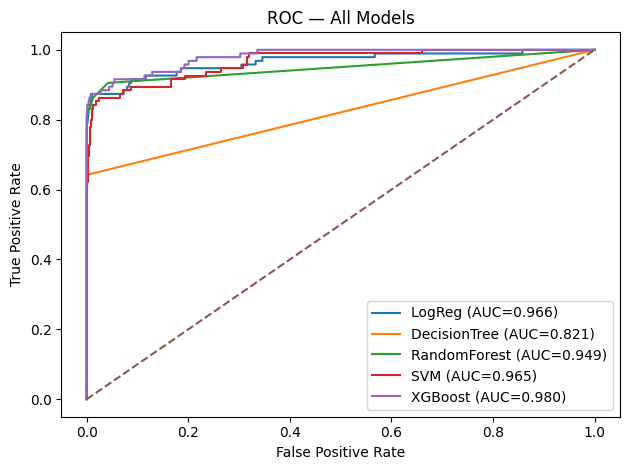

In [74]:
plt.figure()
for name, clf in models.items():
    Xte = X_test_scaled if name in ["LogReg", "SVM"] else X_test
    proba = clf.predict_proba(Xte)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — All Models")
plt.legend()
plt.tight_layout(); plt.show()


# Step 6: Summary & Insights

* In a summry, the best model is XGboost that give highest PR-AUC/ROC-AUC in your runs; best overall sepration. Then will come, random forst and logistics regression. the weakest is decisson tree. 

# * why accusrcy mislead?
With 0.2% fraud, predicting “non-fraud” for everyone gives ~99.8% accuracy but recall = 0. Use Precision/Recall, F1, PR-AUC instead.

# * Next steps (quick wins):

- Threshold tuning on the best model (optimize for your target precision/recall).
- Cost-sensitive training (class weights / scale_pos_weight).
- Ensemble (blend XGBoost + RF; calibrate probabilities).
- Anomaly layer for high-risk segments (e.g., Isolation Forest).
- Feature engineering (amount velocity, device/IP, merchant/customer history).